In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pandas import read_csv
import seaborn as sns
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
from bokeh.plotting import Figure, show, output_notebook
from IPython.display import Image
from scipy import stats

# MSP data for each crop at the Mandi

In [4]:
df = read_csv(r"/Users/vibhu/Desktop/Untitled Folder/drive-download-20190303T055038Z-001/CMO_MSP_Mandi.csv")

In [5]:
df.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
commodity     155 non-null object
year          155 non-null int64
Type          155 non-null object
msprice       145 non-null float64
msp_filter    155 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.1+ KB


*msp_filter* has 145 not null values, which implies that there's data missing for 10 rows. They are as follows:

In [7]:
df[df.isnull().any(axis=1)]

,commodity,year,Type,msprice,msp_filter
107,Soyabean_Black,2015,Kharif Crops,NaN,1
138,Soyabean_Black,2016,Kharif Crops,NaN,1
142,WHEAT(HUSKED),2016,Rabi Crops,NaN,1
143,WHEAT(UNHUSKED),2016,Rabi Crops,NaN,1
144,BARLI,2016,Rabi Crops,NaN,1
145,Gram_Yellow,2016,Rabi Crops,NaN,1
146,Masur_Yellow,2016,Rabi Crops,NaN,1
147,MUSTARD,2016,Rabi Crops,NaN,1
148,SAFFLOWER,2016,Rabi Crops,NaN,1
149,Toria_Yellow,2016,Rabi Crops,NaN,1


* Soyabean_Black lacks data for two years.
* The rest lack data for the year 2016 only.

I will just fill up these blank spaces with the value of the previous year. Later we'll see that this proves to be a good approximation.

In [8]:
df = df.fillna(method="ffill", limit=2)

In [9]:
df[df.isnull().any(axis=1)]

,commodity,year,Type,msprice,msp_filter
144,BARLI,2016,Rabi Crops,NaN,1
145,Gram_Yellow,2016,Rabi Crops,NaN,1
146,Masur_Yellow,2016,Rabi Crops,NaN,1
147,MUSTARD,2016,Rabi Crops,NaN,1
148,SAFFLOWER,2016,Rabi Crops,NaN,1
149,Toria_Yellow,2016,Rabi Crops,NaN,1


In [10]:
df = df.fillna(method="ffill", limit=1)


In [11]:
df[df.isnull().any(axis=1)]

,commodity,year,Type,msprice,msp_filter
145,Gram_Yellow,2016,Rabi Crops,NaN,1
146,Masur_Yellow,2016,Rabi Crops,NaN,1
147,MUSTARD,2016,Rabi Crops,NaN,1
148,SAFFLOWER,2016,Rabi Crops,NaN,1
149,Toria_Yellow,2016,Rabi Crops,NaN,1


In [12]:
df = df.fillna(method="ffill", limit=2)

In [13]:
df[df.isnull().any(axis=1)]

,commodity,year,Type,msprice,msp_filter
147,MUSTARD,2016,Rabi Crops,NaN,1
148,SAFFLOWER,2016,Rabi Crops,NaN,1
149,Toria_Yellow,2016,Rabi Crops,NaN,1


In [14]:
df = df.fillna(method="ffill", limit=2)

In [15]:
df[df.isnull().any(axis=1)]

,commodity,year,Type,msprice,msp_filter
149,Toria_Yellow,2016,Rabi Crops,NaN,1


In [16]:
df = df.fillna(method="ffill", limit=2)

In [17]:
df[df.isnull().any(axis=1)]

,commodity,year,Type,msprice,msp_filter


We have successfully filled all the missing values

In [18]:
df.describe(include='all')

,commodity,year,Type,msprice,msp_filter
count,155,155.000000,155,155.000000,155.0
unique,32,NaN,3,NaN,NaN
top,PADDY-UNHUSKED,NaN,Kharif Crops,NaN,NaN
freq,5,NaN,90,NaN,NaN
mean,NaN,2014.000000,NaN,2881.967742,1.0
std,NaN,1.418798,NaN,1412.591279,0.0
min,NaN,2012.000000,NaN,170.000000,1.0
25%,NaN,2013.000000,NaN,1500.000000,1.0
50%,NaN,2014.000000,NaN,3020.000000,1.0
75%,NaN,2015.000000,NaN,3855.000000,1.0


* We have 32 unique commodities
* We have data from year 2012 to 2016 => 5 yrs 
* We have three unique types of crops

In [19]:
df['msp_filter'].value_counts()

1    155
Name: msp_filter, dtype: int64

the values for *msp_filter* in all the rows in the same. Thus, we can drop this column.

In [20]:
df= df.drop(['msp_filter'], axis=1)

In [21]:
df.groupby(df['year'])['commodity'].value_counts().unstack(level=0, fill_value=0)

year,2012,2013,2014,2015,2016
commodity,,,,,
BAJRI,1,1,1,1,1
BARLI,1,1,1,1,1
COCONUT,1,1,1,1,1
COTTON,1,1,1,1,1
Copra (Ball)_Yellow,1,1,1,1,1
Copra (Milling)_Yellow,1,1,1,1,1
Cotton_Long Staple,1,1,1,1,1
GR.NUT KERNELS,1,1,1,1,1
Gram_Yellow,1,1,1,1,1


Here "1" signifies that there's one datapoint at the corresponding attributes. We see some discrepancy in the SUGARCANE and the SUGAR-CANE rows

In [22]:
df[df['commodity'].isin(['SUGAR-CANE','SUGARCANE'])]

,commodity,year,Type,msprice
30,SUGAR-CANE,2012,Other Crops,170.0
61,SUGAR-CANE,2013,Other Crops,210.0
92,SUGAR-CANE,2014,Other Crops,220.0
123,SUGAR-CANE,2015,Other Crops,230.0
154,SUGARCANE,2016,Other Crops,230.0


Hence it's clear that there has been a typo. We will simply replace *SUGARCANE* with *SUGAR-CANE*

In [23]:
df = df.replace(['SUGARCANE'], ['SUGAR-CANE'])

In [24]:
df.groupby(df['year'])['commodity'].value_counts().unstack(level=0, fill_value=0)

year,2012,2013,2014,2015,2016
commodity,,,,,
BAJRI,1,1,1,1,1
BARLI,1,1,1,1,1
COCONUT,1,1,1,1,1
COTTON,1,1,1,1,1
Copra (Ball)_Yellow,1,1,1,1,1
Copra (Milling)_Yellow,1,1,1,1,1
Cotton_Long Staple,1,1,1,1,1
GR.NUT KERNELS,1,1,1,1,1
Gram_Yellow,1,1,1,1,1


Thus we now have 5 data points for each commodity

A more pleasing way to see the datasheet is in a form of a pivot table:

In [25]:
df.pivot(index='commodity', columns='year', values='msprice')

year,2012,2013,2014,2015,2016
commodity,,,,,
BAJRI,1175.0,1310.0,1250.0,1275.0,1330.0
BARLI,980.0,1100.0,1150.0,1225.0,3725.0
COCONUT,1400.0,1425.0,1425.0,1500.0,1600.0
COTTON,3600.0,3700.0,3750.0,3800.0,3860.0
Copra (Ball)_Yellow,5350.0,5500.0,5500.0,5830.0,6240.0
Copra (Milling)_Yellow,5100.0,5250.0,5250.0,5550.0,5950.0
Cotton_Long Staple,3900.0,4000.0,4050.0,4100.0,4160.0
GR.NUT KERNELS,3700.0,4000.0,4000.0,4030.0,4120.0
Gram_Yellow,3000.0,3100.0,3175.0,3425.0,3725.0


In [26]:
matplotlib inline

In [27]:
table = df.pivot(index='commodity', columns='year', values='msprice')

In [28]:
table

year,2012,2013,2014,2015,2016
commodity,,,,,
BAJRI,1175.0,1310.0,1250.0,1275.0,1330.0
BARLI,980.0,1100.0,1150.0,1225.0,3725.0
COCONUT,1400.0,1425.0,1425.0,1500.0,1600.0
COTTON,3600.0,3700.0,3750.0,3800.0,3860.0
Copra (Ball)_Yellow,5350.0,5500.0,5500.0,5830.0,6240.0
Copra (Milling)_Yellow,5100.0,5250.0,5250.0,5550.0,5950.0
Cotton_Long Staple,3900.0,4000.0,4050.0,4100.0,4160.0
GR.NUT KERNELS,3700.0,4000.0,4000.0,4030.0,4120.0
Gram_Yellow,3000.0,3100.0,3175.0,3425.0,3725.0


<Figure size 216x288 with 0 Axes>

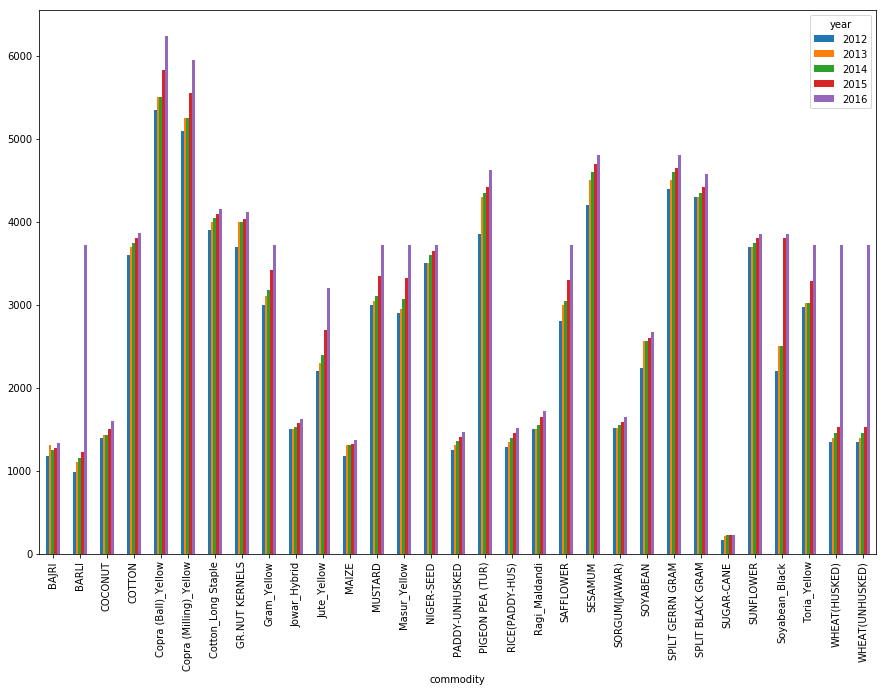

In [29]:
plt.figure(figsize=(3,4))
table.plot(kind='bar',figsize=(15,10))

In [30]:
pd.pivot_table(df, 'msprice', ['commodity', 'Type'], 'year')

,year,2012,2013,2014,2015,2016
commodity,Type,,,,,
BAJRI,Kharif Crops,1175.0,1310.0,1250.0,1275.0,1330.0
BARLI,Rabi Crops,980.0,1100.0,1150.0,1225.0,3725.0
COCONUT,Other Crops,1400.0,1425.0,1425.0,1500.0,1600.0
COTTON,Kharif Crops,3600.0,3700.0,3750.0,3800.0,3860.0
Copra (Ball)_Yellow,Other Crops,5350.0,5500.0,5500.0,5830.0,6240.0
Copra (Milling)_Yellow,Other Crops,5100.0,5250.0,5250.0,5550.0,5950.0
Cotton_Long Staple,Kharif Crops,3900.0,4000.0,4050.0,4100.0,4160.0
GR.NUT KERNELS,Kharif Crops,3700.0,4000.0,4000.0,4030.0,4120.0
Gram_Yellow,Rabi Crops,3000.0,3100.0,3175.0,3425.0,3725.0


In [31]:
all_names_index = df.set_index(['Type','commodity','year']).sort_index()

In [32]:
all_names_index.head(10)

msprice
Type         commodity year         
Kharif Crops BAJRI     2012   1175.0
                       2013   1310.0
                       2014   1250.0
                       2015   1275.0
                       2016   1330.0
             COTTON    2012   3600.0
                       2013   3700.0
                       2014   3750.0
                       2015   3800.0
                       2016   3860.0

In [33]:
df['Type'].value_counts()

Kharif Crops    90
Rabi Crops      40
Other Crops     25
Name: Type, dtype: int64

In [34]:
df.groupby(df['Type'])['commodity'].value_counts()

Type          commodity             
Kharif Crops  BAJRI                     5
              COTTON                    5
              Cotton_Long Staple        5
              GR.NUT KERNELS            5
              Jowar_Hybrid              5
              MAIZE                     5
              NIGER-SEED                5
              PADDY-UNHUSKED            5
              PIGEON PEA (TUR)          5
              RICE(PADDY-HUS)           5
              Ragi_Maldandi             5
              SESAMUM                   5
              SORGUM(JAWAR)             5
              SOYABEAN                  5
              SPILT GERRN GRAM          5
              SPLIT BLACK GRAM          5
              SUNFLOWER                 5
              Soyabean_Black            5
Other Crops   COCONUT                   5
              Copra (Ball)_Yellow       5
              Copra (Milling)_Yellow    5
              Jute_Yellow               5
              SUGAR-CANE               

For Kharif crops:

In [35]:
df.groupby(df['Type'])['commodity'].unique()[0]

array(['PADDY-UNHUSKED', 'RICE(PADDY-HUS)', 'Jowar_Hybrid',
       'SORGUM(JAWAR)', 'BAJRI', 'MAIZE', 'Ragi_Maldandi',
       'PIGEON PEA (TUR)', 'SPILT GERRN GRAM', 'SPLIT BLACK GRAM',
       'COTTON', 'Cotton_Long Staple', 'GR.NUT KERNELS', 'SUNFLOWER',
       'Soyabean_Black', 'SOYABEAN', 'SESAMUM', 'NIGER-SEED'],
      dtype=object)

In [36]:
df.groupby(df['Type'])['commodity'].unique().index[0]

'Kharif Crops'

In [37]:
for i,name in enumerate(df.groupby(df['Type'])['commodity'].unique()):
    print("No. of ", df.groupby(df['Type'])['commodity'].unique().index[i]," = ", len(df.groupby(df['Type'])['commodity'].unique()[i]))

No. of  Kharif Crops  =  18
No. of  Other Crops  =  5
No. of  Rabi Crops  =  8


In [38]:
df[df['Type'].isin(['Kharif Crops'])]['commodity'].value_counts()

PADDY-UNHUSKED        5
PIGEON PEA (TUR)      5
COTTON                5
Cotton_Long Staple    5
SORGUM(JAWAR)         5
SPLIT BLACK GRAM      5
SOYABEAN              5
Soyabean_Black        5
GR.NUT KERNELS        5
RICE(PADDY-HUS)       5
Jowar_Hybrid          5
NIGER-SEED            5
Ragi_Maldandi         5
MAIZE                 5
BAJRI                 5
SUNFLOWER             5
SESAMUM               5
SPILT GERRN GRAM      5
Name: commodity, dtype: int64

In [39]:
all_names_index.loc['Kharif Crops', 'RICE(PADDY-HUS)']

,msprice
year,
2012,1280.0
2013,1345.0
2014,1400.0
2015,1450.0
2016,1510.0


In [40]:
def name_plot(crop_type, name):
    data = all_names_index.loc[crop_type, name]
    plt.plot(data.index, data.values, '--', marker='*')

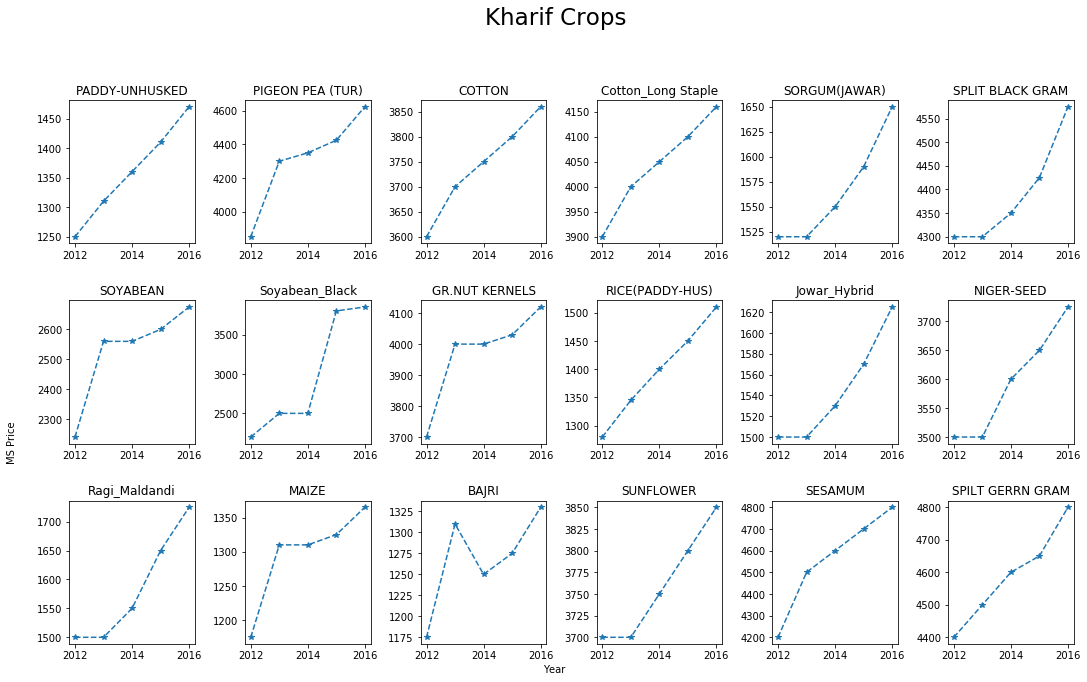

In [281]:
fig = plt.figure(figsize = (18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, name in enumerate(df[df['Type'].isin(['Kharif Crops'])]['commodity'].value_counts().index):
    ax = fig.add_subplot(3, 6, i+1)
    name_plot('Kharif Crops', name)
    plt.title(name)
#     plt.xlabel("year")
#     plt.ylabel("count")
# fig.tight_layout()

plt.text(1998, 4300, 'Year', ha='center', va='center')
plt.text(1979, 5000, 'MS Price', ha='center', va='center', rotation='vertical')
plt.suptitle("Kharif Crops", fontsize=23, color='black', style='normal', y=1.01)
plt.show()

Text(0.5, 1.01, 'Rabi Crops')

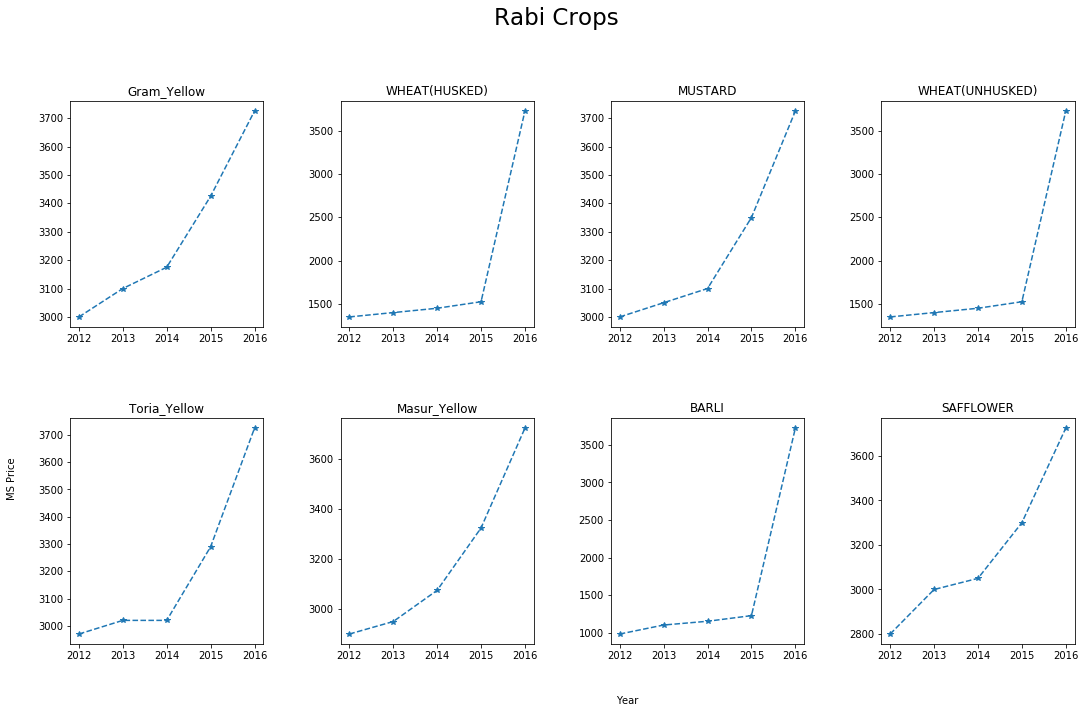

In [275]:
fig = plt.figure(figsize = (18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, name in enumerate(df[df['Type'].isin(['Rabi Crops'])]['commodity'].value_counts().index):
    ax = fig.add_subplot(2, 4, i+1)
    name_plot('Rabi Crops', name)
    plt.title(name)
#     plt.xlabel("year")
#     plt.ylabel("count")
# fig.tight_layout()

plt.text(2006, 2500, 'Year', ha='center', va='center')
plt.text(1992, 3500, 'MS Price', ha='center', va='center', rotation='vertical')
plt.suptitle("Rabi Crops", fontsize=23, color='black', style='normal', y=1.01)

Text(0.5, 1.01, 'Other Crops')

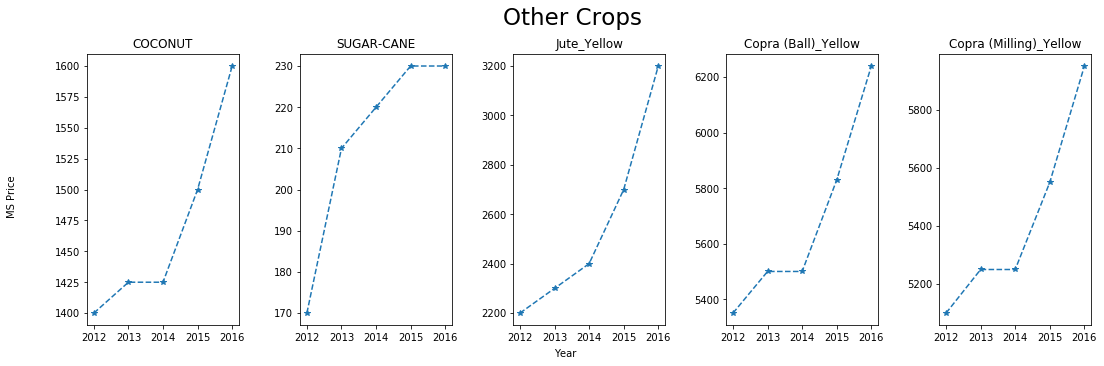

In [288]:
fig = plt.figure(figsize = (18, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, name in enumerate(df[df['Type'].isin(['Other Crops'])]['commodity'].value_counts().index):
    ax = fig.add_subplot(1, 5, i+1)
    name_plot('Other Crops', name)
    plt.title(name)
#     plt.xlabel("year")
#     plt.ylabel("count")
# fig.tight_layout()

plt.text(2001, 4960, 'Year', ha='center', va='center')
plt.text(1985, 5500, 'MS Price', ha='center', va='center', rotation='vertical')
plt.suptitle("Other Crops", fontsize=23, color='black', style='normal', y=1.01)

There is eveidently some deviation from a linear behaviour in some of the ms prices over the years. We assume that that prices which lie outside the 1.5 times the range between the first and the third quartiles are outliers.

# Removing Outliers from CMO Data

In [44]:
data_main=pd.DataFrame()
commodities=list(df["commodity"].unique())
for commodity in commodities:
    data_temp=df[df["commodity"]==commodity]
    actual=len(data_temp)
    if actual>1:
        q1 = data_temp["msprice"].quantile(0.25)
        q3 = data_temp["msprice"].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        lower_threshold  = q1-1.5*iqr
        upper_threshold = q3+1.5*iqr
        filtered_values=[upper_threshold if x> upper_threshold else x for x in data_temp["msprice"].tolist()]
        filtered_values=[lower_threshold if x< lower_threshold else x for x in filtered_values]
        data_temp["msprice"]=filtered_values
        data_temp.sort_values("year",inplace=True)

    data_main=pd.concat([data_main,data_temp])
    data_main.reset_index(drop=True,inplace=True)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Let's print out our culprits:

In [45]:
pd.concat([df,data_main]).drop_duplicates(keep=False)

,commodity,year,Type,msprice
5,MAIZE,2012,Kharif Crops,1175.0
7,PIGEON PEA (TUR),2012,Kharif Crops,3850.0
12,GR.NUT KERNELS,2012,Kharif Crops,3700.0
15,SOYABEAN,2012,Kharif Crops,2240.0
30,SUGAR-CANE,2012,Other Crops,170.0
129,MAIZE,2016,Kharif Crops,1365.0
131,PIGEON PEA (TUR),2016,Kharif Crops,4625.0
136,GR.NUT KERNELS,2016,Kharif Crops,4120.0
139,SOYABEAN,2016,Kharif Crops,2675.0
142,WHEAT(HUSKED),2016,Rabi Crops,3725.0


Let's plot box plots for all the commodities which consist of outliers:

In [46]:
def plot_commodity_outliers(df): #plot commodity price outliers in a particular type 
    commodities=list(df["commodity"].unique())
    flag=0
    for commodity in commodities:
        data_temp=df[df["commodity"]==commodity]
        actual=len(data_temp)
        if actual>1:
            q1 = data_temp["msprice"].quantile(0.25)
            q3 = data_temp["msprice"].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q3+1.5*iqr
            data_filter=data_temp[(data_temp["msprice"] > lower_threshold) 
                                  & (data_temp["msprice"] < upper_threshold)]
            filtered=len(data_filter)
            
            #we will plot only those plots where the outliers are present
            if actual!=filtered:
                flag=1
                plt.figure(figsize=(6,4))
                plt.title(commodity)
                sns.boxplot(x="commodity", y="msprice",data=data_filter) #box plot
                sns.stripplot(x="commodity", y="msprice",data=data_temp,jitter=True,marker='o',alpha=0.5,color='red') #overlay dat points (show outliers which are not compensated)
                patch_1 = mpatches.Patch(color='#31749F', label=commodity)
                patch_2 = mpatches.Patch(color='red',alpha=0.5,label='Data Points')
                plt.legend(handles=[patch_1,patch_2])
                plt.show()
    if flag==0:
        print("No commodity price outlier in ",df["Type"].iloc[0] )

### Kharif Crops

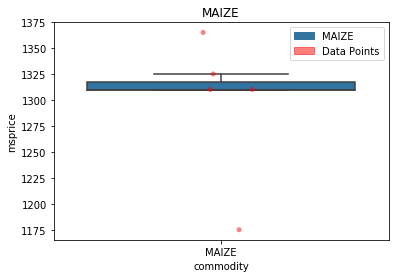

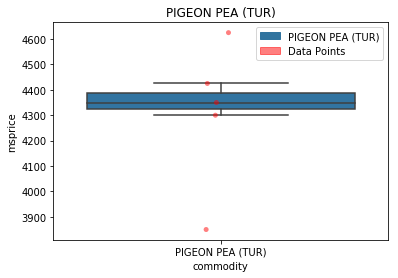

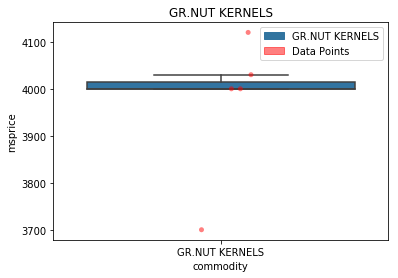

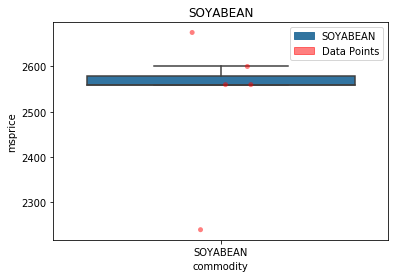

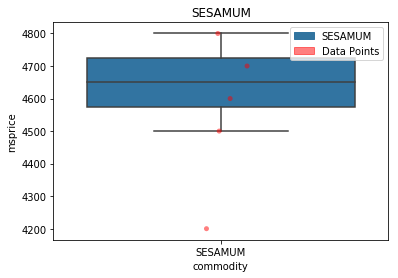

In [47]:
plot_commodity_outliers(df[df["Type"]=="Kharif Crops"])

### Rabi Crops

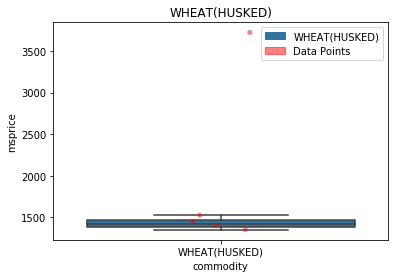

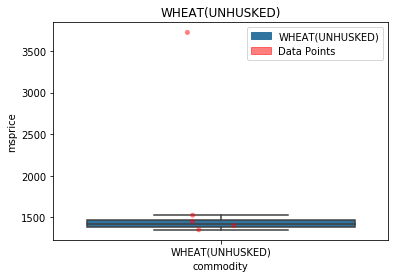

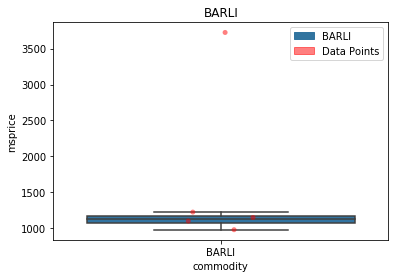

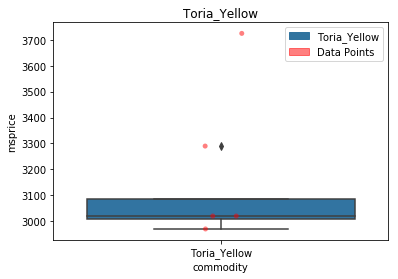

In [48]:
plot_commodity_outliers(df[df["Type"]=="Rabi Crops"])

### Other Crops

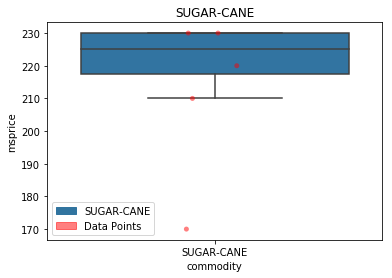

In [49]:
plot_commodity_outliers(df[df["Type"]=="Other Crops"])

In [50]:
data_main.to_csv("CMO_MSP_Mandi_final.csv",index=False)

# Data in the Monthly Mandi data (_df2_)

# Monthly Data of crop sale prices from the Mandi

In [72]:
df2 = read_csv(r"/Users/vibhu/Desktop/Untitled Folder/drive-download-20190303T055038Z-001/Monthly_data_cmo.csv", 
               parse_dates = [[2,3]],infer_datetime_format=True)

In [73]:
df2.head()

,Year_Month,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,2015-04-01,Ahmednagar,Bajri,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,2016-04-01,Ahmednagar,Bajri,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,2015-04-01,Ahmednagar,Wheat(Husked),1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,2016-04-01,Ahmednagar,Wheat(Husked),387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,2015-04-01,Ahmednagar,Sorgum(Jawar),3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [74]:
df2['Year_Month'] = pd.to_datetime(df2['Year_Month'])

In [75]:
df2.head()

,Year_Month,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,2015-04-01,Ahmednagar,Bajri,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,2016-04-01,Ahmednagar,Bajri,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,2015-04-01,Ahmednagar,Wheat(Husked),1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,2016-04-01,Ahmednagar,Wheat(Husked),387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,2015-04-01,Ahmednagar,Sorgum(Jawar),3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [76]:
df2=df2.sort_values(by='Year_Month')

In [77]:
df2= df2.drop(['state_name'], axis=1)

In [78]:
df2= df2.drop(['date'], axis=1)

In [82]:
df2=df2.reset_index(drop=True)

In [83]:
df2.head()

,Year_Month,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,district_name
0,2014-09-01,Kurdwadi,Sorgum(Jawar),454,1353,2610,1981,Solapur
1,2014-09-01,Satara,Ladies Finger,128,2435,3261,2848,Satara
2,2014-09-01,Satara,Potato,2988,2175,2488,2331,Satara
3,2014-09-01,Satara,Ginger (Fresh),199,3438,4813,4125,Satara
4,2014-09-01,Satara,Ground Nut Pods (Dry),1,3000,4000,3500,Satara


## Cleaning outliers

In [86]:
def remove_outlier(df): #find outlier according to the modal price of commodity and remove them
    data_main=pd.DataFrame()
    commodities=list(df["Commodity"].unique())
    for commodity in commodities:
        data_temp=df[df["Commodity"]==commodity]
        actual=len(data_temp)
        if actual>1:
            q1 = data_temp["modal_price"].quantile(0.25)
            q3 = data_temp["modal_price"].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q3+1.5*iqr
            filtered_values=[upper_threshold if x> upper_threshold else x for x in data_temp["modal_price"].tolist()]
            filtered_values=[lower_threshold if x< lower_threshold else x for x in filtered_values]
            data_temp["modal_price"]=filtered_values
            data_temp.sort_values("Year_Month",inplace=True)
            
        data_main=pd.concat([data_main,data_temp])
        data_main.reset_index(drop=True,inplace=True)
    return data_main

In [87]:
df_filtered=pd.DataFrame()
for apmc in df2["APMC"].unique().tolist():
    df_temp = df2[df2["APMC"]==apmc]
    data = remove_outlier(df_temp)
    df_filtered=pd.concat([df_filtered,data])
    
df_filtered.reset_index(drop=True,inplace=True)
df_filtered.to_csv("Monthly_data_cmo_filtered.csv",index=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


## Exploring Monthly Data

In [174]:
df3=pd.read_csv("Monthly_data_cmo_filtered.csv")

In [175]:
df3.index = pd.to_datetime(df3['Year_Month'])

In [176]:
type(df.index)

pandas.core.indexes.range.RangeIndex

In [181]:
df3["Year_Month"]=pd.to_datetime(df3["Year_Month"])
df3["quarter"]=df3["Year_Month"].dt.quarter
df3["combination_label"]=df3["APMC"]+":"+df3["Commodity"]

In [182]:
df3[df3["APMC" ]== "Ahmednagar" ].head()

,Year_Month,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,district_name,quarter,combination_label
Year_Month,,,,,,,,,,
2014-09-01,2014-09-01,Ahmednagar,Sorgum(Jawar),42,1600,2601,2100.0,Ahmadnagar,3,Ahmednagar:Sorgum(Jawar)
2014-11-01,2014-11-01,Ahmednagar,Sorgum(Jawar),2024,1782,2713,2248.0,Ahmadnagar,4,Ahmednagar:Sorgum(Jawar)
2015-01-01,2015-01-01,Ahmednagar,Sorgum(Jawar),1892,1707,2718,2212.0,Ahmadnagar,1,Ahmednagar:Sorgum(Jawar)
2015-02-01,2015-02-01,Ahmednagar,Sorgum(Jawar),602,1575,2000,1787.0,Ahmadnagar,1,Ahmednagar:Sorgum(Jawar)
2015-03-01,2015-03-01,Ahmednagar,Sorgum(Jawar),1949,1560,2100,1830.0,Ahmadnagar,1,Ahmednagar:Sorgum(Jawar)


In [183]:
df3.query('APMC == "Ahmednagar" & Commodity == "Lemon"').head()

,Year_Month,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,district_name,quarter,combination_label
Year_Month,,,,,,,,,,
2015-06-01,2015-06-01,Ahmednagar,Lemon,207,833,2583,1708.0,Ahmadnagar,2,Ahmednagar:Lemon
2015-07-01,2015-07-01,Ahmednagar,Lemon,298,1450,2275,1863.0,Ahmadnagar,3,Ahmednagar:Lemon
2015-08-01,2015-08-01,Ahmednagar,Lemon,75,840,1620,1230.0,Ahmadnagar,3,Ahmednagar:Lemon
2015-09-01,2015-09-01,Ahmednagar,Lemon,16,1500,2750,2125.0,Ahmadnagar,3,Ahmednagar:Lemon
2015-10-01,2015-10-01,Ahmednagar,Lemon,195,1867,3244,2306.0,Ahmadnagar,4,Ahmednagar:Lemon


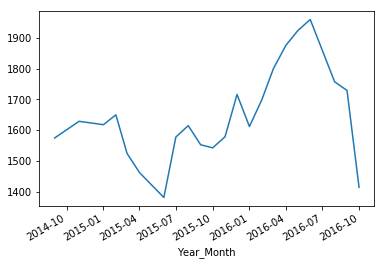

In [184]:
df3.query('APMC == "Ahmednagar" & Commodity == "Bajri"').modal_price.plot()

Seasonality:  AxesSubplot(0.125,0.2;0.775x0.68)


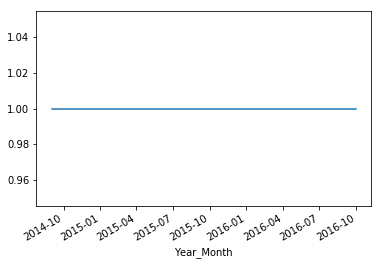

In [185]:
result = seasonal_decompose(df3.query('APMC == "Ahmednagar" & Commodity == "Bajri"').modal_price, 
                            model='multiplicative', 
                            freq = 1)
print("Seasonality: ",
      result.seasonal.plot())

Seasonality:  AxesSubplot(0.125,0.2;0.775x0.68)


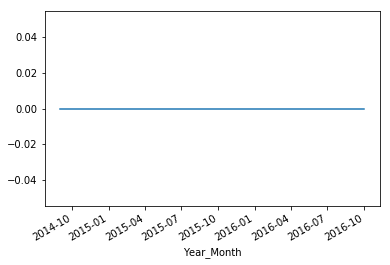

In [186]:
result = seasonal_decompose(df3.query('APMC == "Ahmednagar" & Commodity == "Bajri"').modal_price, 
                            model='additive', 
                            freq = 1)
print("Seasonality: ",
      result.seasonal.plot())

## Detecting the Seasonality Type

In [187]:
def check_seasonality_type(data_filter):
    
    data_filter["trend"]=data_filter["modal_price"].rolling(window=2).mean()

    data_filter["detrended_additive"]=data_filter["modal_price"]-data_filter["trend"]
    data_filter["detrended_multiplicative"]=data_filter["modal_price"]/data_filter["trend"]

    additive_mean=data_filter[["detrended_additive","quarter"]].groupby(["quarter"]).mean().to_dict()["detrended_additive"]
    multiplicative_mean=data_filter[["detrended_multiplicative","quarter"]].groupby(["quarter"]).mean().to_dict()["detrended_multiplicative"]

    data_filter["seasonal_additive"]=data_filter["quarter"].apply(lambda x: additive_mean[x])
    data_filter["seasonal_multiplicative"]=data_filter["quarter"].apply(lambda x: multiplicative_mean[x])

    data_filter["residual_additive"]=data_filter["detrended_additive"]-data_filter["seasonal_additive"]
    data_filter["residual_multiplicative"]=data_filter["detrended_multiplicative"]-data_filter["seasonal_multiplicative"]

    additive_acf=sum(np.asarray(acf(data_filter["residual_additive"], missing='drop'))*2)
    multiplicative_acf=sum(np.asarray(acf(data_filter["residual_multiplicative"], missing='drop'))*2)

    if additive_acf<multiplicative_acf:
        return "Additive"
    else:
        return "Multiplicative"

In [188]:
df3.head()

,Year_Month,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,district_name,quarter,combination_label
Year_Month,,,,,,,,,,
2014-09-01,2014-09-01,Kurdwadi,Sorgum(Jawar),454,1353,2610,1981.0,Solapur,3,Kurdwadi:Sorgum(Jawar)
2014-10-01,2014-10-01,Kurdwadi,Sorgum(Jawar),241,1212,2345,1779.0,Solapur,4,Kurdwadi:Sorgum(Jawar)
2014-11-01,2014-11-01,Kurdwadi,Sorgum(Jawar),558,1183,2764,1973.0,Solapur,4,Kurdwadi:Sorgum(Jawar)
2014-12-01,2014-12-01,Kurdwadi,Sorgum(Jawar),657,1114,2609,1861.0,Solapur,4,Kurdwadi:Sorgum(Jawar)
2015-01-01,2015-01-01,Kurdwadi,Sorgum(Jawar),6418,1185,2496,1840.0,Solapur,1,Kurdwadi:Sorgum(Jawar)


In [202]:
df3['Year']=pd.DatetimeIndex(df3['Year_Month']).year

In [205]:
data=df3[["APMC","Commodity","modal_price","Year","combination_label"]
       ].groupby(["APMC","Commodity","Year","combination_label"],
         as_index=False).count().rename(columns={"modal_price":"Count"}).reset_index(drop=True)
data=data[data["Count"]==12].reset_index(drop=True)
filtered=data["combination_label"].unique().tolist()
df_filtered=df3[df3["combination_label"].isin(filtered)].reset_index(drop=True)
df_filtered.head()

,Year_Month,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,district_name,quarter,combination_label,Year
0,2014-09-01,Kurdwadi,Sorgum(Jawar),454,1353,2610,1981.0,Solapur,3,Kurdwadi:Sorgum(Jawar),2014
1,2014-10-01,Kurdwadi,Sorgum(Jawar),241,1212,2345,1779.0,Solapur,4,Kurdwadi:Sorgum(Jawar),2014
2,2014-11-01,Kurdwadi,Sorgum(Jawar),558,1183,2764,1973.0,Solapur,4,Kurdwadi:Sorgum(Jawar),2014
3,2014-12-01,Kurdwadi,Sorgum(Jawar),657,1114,2609,1861.0,Solapur,4,Kurdwadi:Sorgum(Jawar),2014
4,2015-01-01,Kurdwadi,Sorgum(Jawar),6418,1185,2496,1840.0,Solapur,1,Kurdwadi:Sorgum(Jawar),2015


In [206]:
commodities=list(df_filtered["combination_label"].unique())
seasonality_type=[]
for commodity in commodities:
    data_filter=df_filtered[df_filtered["combination_label"]==commodity]
    seasonality_type.append((commodity,check_seasonality_type(data_filter)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

ValueError: negative dimensions are not allowed

In [210]:
seasonality_type[:10]

[('Kurdwadi:Sorgum(Jawar)', 'Multiplicative'),
 ('Kurdwadi:Wheat(Husked)', 'Additive'),
 ('Kurdwadi:Maize', 'Additive'),
 ('Kurdwadi:Gram', 'Additive'),
 ('Satara:Ladies Finger', 'Multiplicative'),
 ('Satara:Potato', 'Multiplicative'),
 ('Satara:Ginger (Fresh)', 'Multiplicative'),
 ('Satara:Bottle Gourd', 'Multiplicative'),
 ('Satara:Flower', 'Multiplicative'),
 ('Satara:Green Chilli', 'Additive')]

In [211]:
dataframe=pd.DataFrame(seasonality_type,columns=["Commodity","Seasonality Type"])
dataframe.to_csv("seasonality_type.csv",index=False)

## Deseasonalising the prices

In [220]:
def deseasonalise_values(data_filter,value):
    data_filter["trend"]=data_filter["modal_price"].rolling(window=2).mean()
    
    if (value=="Additive"):
        data_filter["detrended_additive"]=data_filter["modal_price"]-data_filter["trend"]
        additive_mean=data_filter[["detrended_additive","quarter"]].groupby(["quarter"]).mean().to_dict()["detrended_additive"]
        data_filter["seasonal_additive"]=data_filter["quarter"].apply(lambda x: additive_mean[x])
        values=data_filter["modal_price"]-data_filter["seasonal_additive"]
        values=values.tolist()
        
    else:
        data_filter["detrended_multiplicative"]=data_filter["modal_price"]/data_filter["trend"]
        multiplicative_mean=data_filter[["detrended_multiplicative","quarter"]].groupby(["quarter"]).mean().to_dict()["detrended_multiplicative"]
        data_filter["seasonal_multiplicative"]=data_filter["quarter"].apply(lambda x: multiplicative_mean[x])
        values=data_filter["modal_price"]/data_filter["seasonal_multiplicative"]
        values=values.tolist()
        
    indexes=data_filter.index.tolist()

    values_range=range(0,len(values))
    
    for index,value in zip(indexes,values_range):
        
        data_filter.at[index,"deseasonalise_price"]=values[value]
        
    return data_filter[["APMC","Commodity","combination_label","Year_Month","Year","modal_price","quarter","deseasonalise_price"]]

In [221]:
df_type=pd.read_csv("seasonality_type.csv").set_index("Commodity").to_dict()["Seasonality Type"]

df_filtered["deseasonalise_price"]=np.nan

In [222]:
commoditites=list(df_type.keys())
data_main=pd.DataFrame() #new data frame 
for commoditiy in commoditites:
    data_temp=deseasonalise_values(df_filtered[df_filtered["combination_label"]==commoditiy],df_type[commoditiy])
    data_main=pd.concat([data_main,data_temp])
data_main.to_csv("deseasonalize_data.csv",index=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [223]:
data_main.head()

,APMC,Commodity,combination_label,Year_Month,Year,modal_price,quarter,deseasonalise_price
0,Kurdwadi,Sorgum(Jawar),Kurdwadi:Sorgum(Jawar),2014-09-01,2014,1981.0,3,1958.761615
1,Kurdwadi,Sorgum(Jawar),Kurdwadi:Sorgum(Jawar),2014-10-01,2014,1779.0,4,1777.633268
2,Kurdwadi,Sorgum(Jawar),Kurdwadi:Sorgum(Jawar),2014-11-01,2014,1973.0,4,1971.484226
3,Kurdwadi,Sorgum(Jawar),Kurdwadi:Sorgum(Jawar),2014-12-01,2014,1861.0,4,1859.570271
4,Kurdwadi,Sorgum(Jawar),Kurdwadi:Sorgum(Jawar),2015-01-01,2015,1840.0,1,1856.049896


In [224]:
data_main['Year_Month']=pd.to_datetime(data_main['Year_Month'])

In [262]:
 def plot_deseasonalised():
    input_APMC=input("Input the APMC: ")
    input_commodity=input("Input the Commodity: ")
    label = input_APMC+":"+input_commodity
    source=data_main[data_main["combination_label"]==label]
    p = Figure(x_axis_type="datetime", plot_width=800, plot_height=350)
    p.line('Year_Month', 'deseasonalise_price',color='green',source=source)
    p.line('Year_Month', 'modal_price',color='blue', source=source)
    p.title.text="APMC:Akole   Commodity:Gram"
    show(p)

In [263]:
plot_deseasonalised()

Input the APMC: Kurdwadi
Input the Commodity: Sorgum(Jawar)


## Finding fluctuations

In [266]:
def highest_price_fluctuation_commodities(df): 
    #return name of commodities with highest price (max_price) fluctuation in each APMC
    data=[]
    commodities=df["combination_label"].unique().tolist()
    for commodity in commodities:
        df_temp=df[df["combination_label"]==commodity]
        value=stats.variation(df_temp["max_price"])
        data.append((commodity,value))
    data.sort(key=lambda x: x[1],reverse= True)
    data=[x[0] for x in data[:20]] #top 20 APMC commodities cluster name
    return data

In [289]:
fluctuation=highest_price_fluctuation_commodities(df_filtered)
fluctuation

['Barshi:Brinjal',
 'Barshi:Tomato',
 'Barshi:Cabbage',
 'Barshi:Green Chilli',
 'Barshi:Flower',
 'Barshi:Lemon',
 'Barshi:Cluster Bean',
 'Barshi:Cucumber',
 'Barshi:Ladies Finger',
 'Barshi:Capsicum',
 'Barshi:Bitter Gourd',
 'Pune:Squash Gourd',
 'Vadgaon Peth:Tomato',
 'Mumbai:Squash Gourd',
 'Aurangabad:Tomato',
 'Solapur:Papai',
 'Shahada:Maize',
 'Kalvan:Onion',
 'Yeola:Onion',
 'Pune-Manjri:Onion']